### Treść zadania

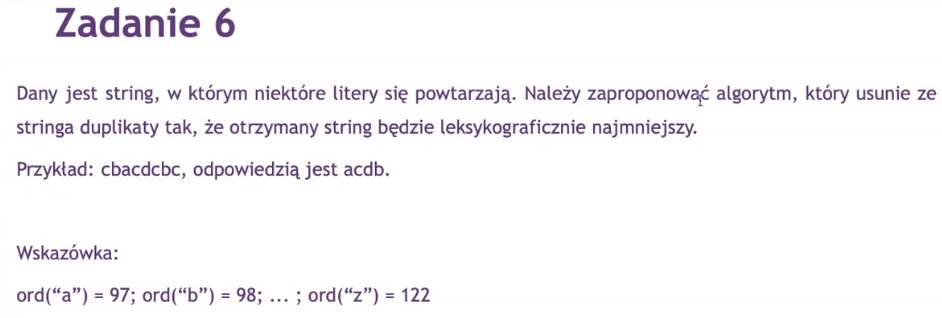

Trochę lepsza implementcja niż ta, która jest przedstawiona w tym pliku:
###### LINK: https://leetcode.com/problems/remove-duplicate-letters/discuss/542040/Slightly-better-solution-than-in-%22Solution%22-tab-C%2B%2B

### Złożoność

###### Obliczeniowa:
$ O(n) $ - (nawet, jeżeli czyścimy cały stos, to maksymalnie łącznie możemy usunąć $ n $ elementów (bo więcej na tym stosie się nigdy nie pojawi))

### Implementacja

In [1]:
def remove_duplicates(string):
    n = len(string)
    # Count the number of repetitions of each character
    ord_a = ord('a')
    counts = [0] * 26
    for i in range(n):
        counts[ord(string[i]) - ord_a] += 1
    # Move linearly through a string and create the lexicographically lowest string
    in_stack = [False] * 26  # Will mark whether a letter is in the stack or not
    # Add the first one to the stack
    first = ord(string[0]) - ord_a
    stack = [first]
    in_stack[first] = True
    counts[first] -= 1
    
    for i in range(1, n):
#         print(i, string[i], stack)
        curr = ord(string[i]) - ord_a
        if not in_stack[curr]:
            if curr < stack[-1]:
                while stack and counts[stack[-1]] > 0 and stack[-1] > curr:
                    in_stack[stack[-1]] = False
                    stack.pop()
                in_stack[curr] = True
                stack.append(curr)
            else:
                stack.append(curr)
                in_stack[curr] = True
        counts[curr] -= 1
        
    # Restore a string from the numbers on a stack
    for i in range(len(stack)):
        stack[i] = chr(ord_a + stack[i])
    # Join characters together to receive a desired string
    return ''.join(stack)

###### Kilka testów

In [2]:
s = 'cbacdcbc'

print(remove_duplicates(s))

acdb


In [3]:
s = 'cbacdcbcda'

print(remove_duplicates(s))

abcd


In [4]:
s = 'a'

print(remove_duplicates(s))

a


In [5]:
s = 'aaaaaaaaa'

print(remove_duplicates(s))

a


In [6]:
from string import ascii_lowercase
import random

sample = random.sample(ascii_lowercase, random.randint(3, 10))
letters = [random.choice(sample) for _ in range(random.randint(1, 40))]
string = ''.join(letters)
res = remove_duplicates(string)
print('Input:', string)
print('Output:', res)
print('Number of unique letters in input:', len(set(string)))
print('Number of unique letters in output:', len(set(res)))

Input: fcipfuufnugfninjpjcugjjugjgjiuuc
Output: cfginjpu
Number of unique letters in input: 8
Number of unique letters in output: 8
